In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

import cmocean
import cmocean.cm as cmo
import seaborn as sns


import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

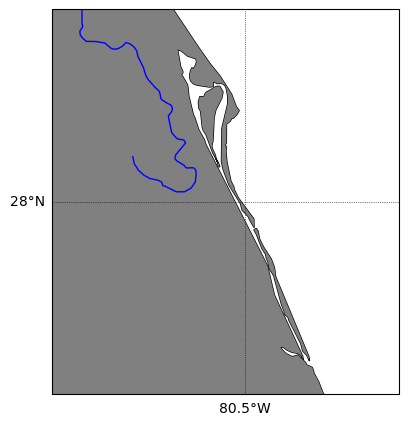

In [21]:
# Change this!
lat_top=29
lat_bot=27.0
lon_left=-81.5
lon_rigth=-79.7
extent=[lon_left, lon_rigth, lat_bot, lat_top]

# set resolution of the features in map: '10m', '50m', or '110m'.  
# If you do this the first time it will take a while downloading the coastline 
# and other features. In the future it will be faster
res = '10m'

#Figure

fig = plt.figure(figsize=(10,5)) # set fig size. You will probably want to change this
ax = fig.add_subplot(111, projection=ccrs.PlateCarree()) #set cartographic projection. There are a bunch
ax.set_extent(extent) # set the extent, or the box of the map
ax.coastlines(res) # set coastilines, and resolution 

#land
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='land',
                                            facecolor='grey', # change color here
                                            scale=res)) 
#Rivers
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='rivers_lake_centerlines',
                                            edgecolor='blue', # change color here
                                            facecolor='none',
                                            scale=res))

#Gir. Only if you want one:
gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                  ylocs=np.arange(lat_bot, lat_top+1),
                  draw_labels=True, 
                  linewidth=0.5, color='k', linestyle=':')
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

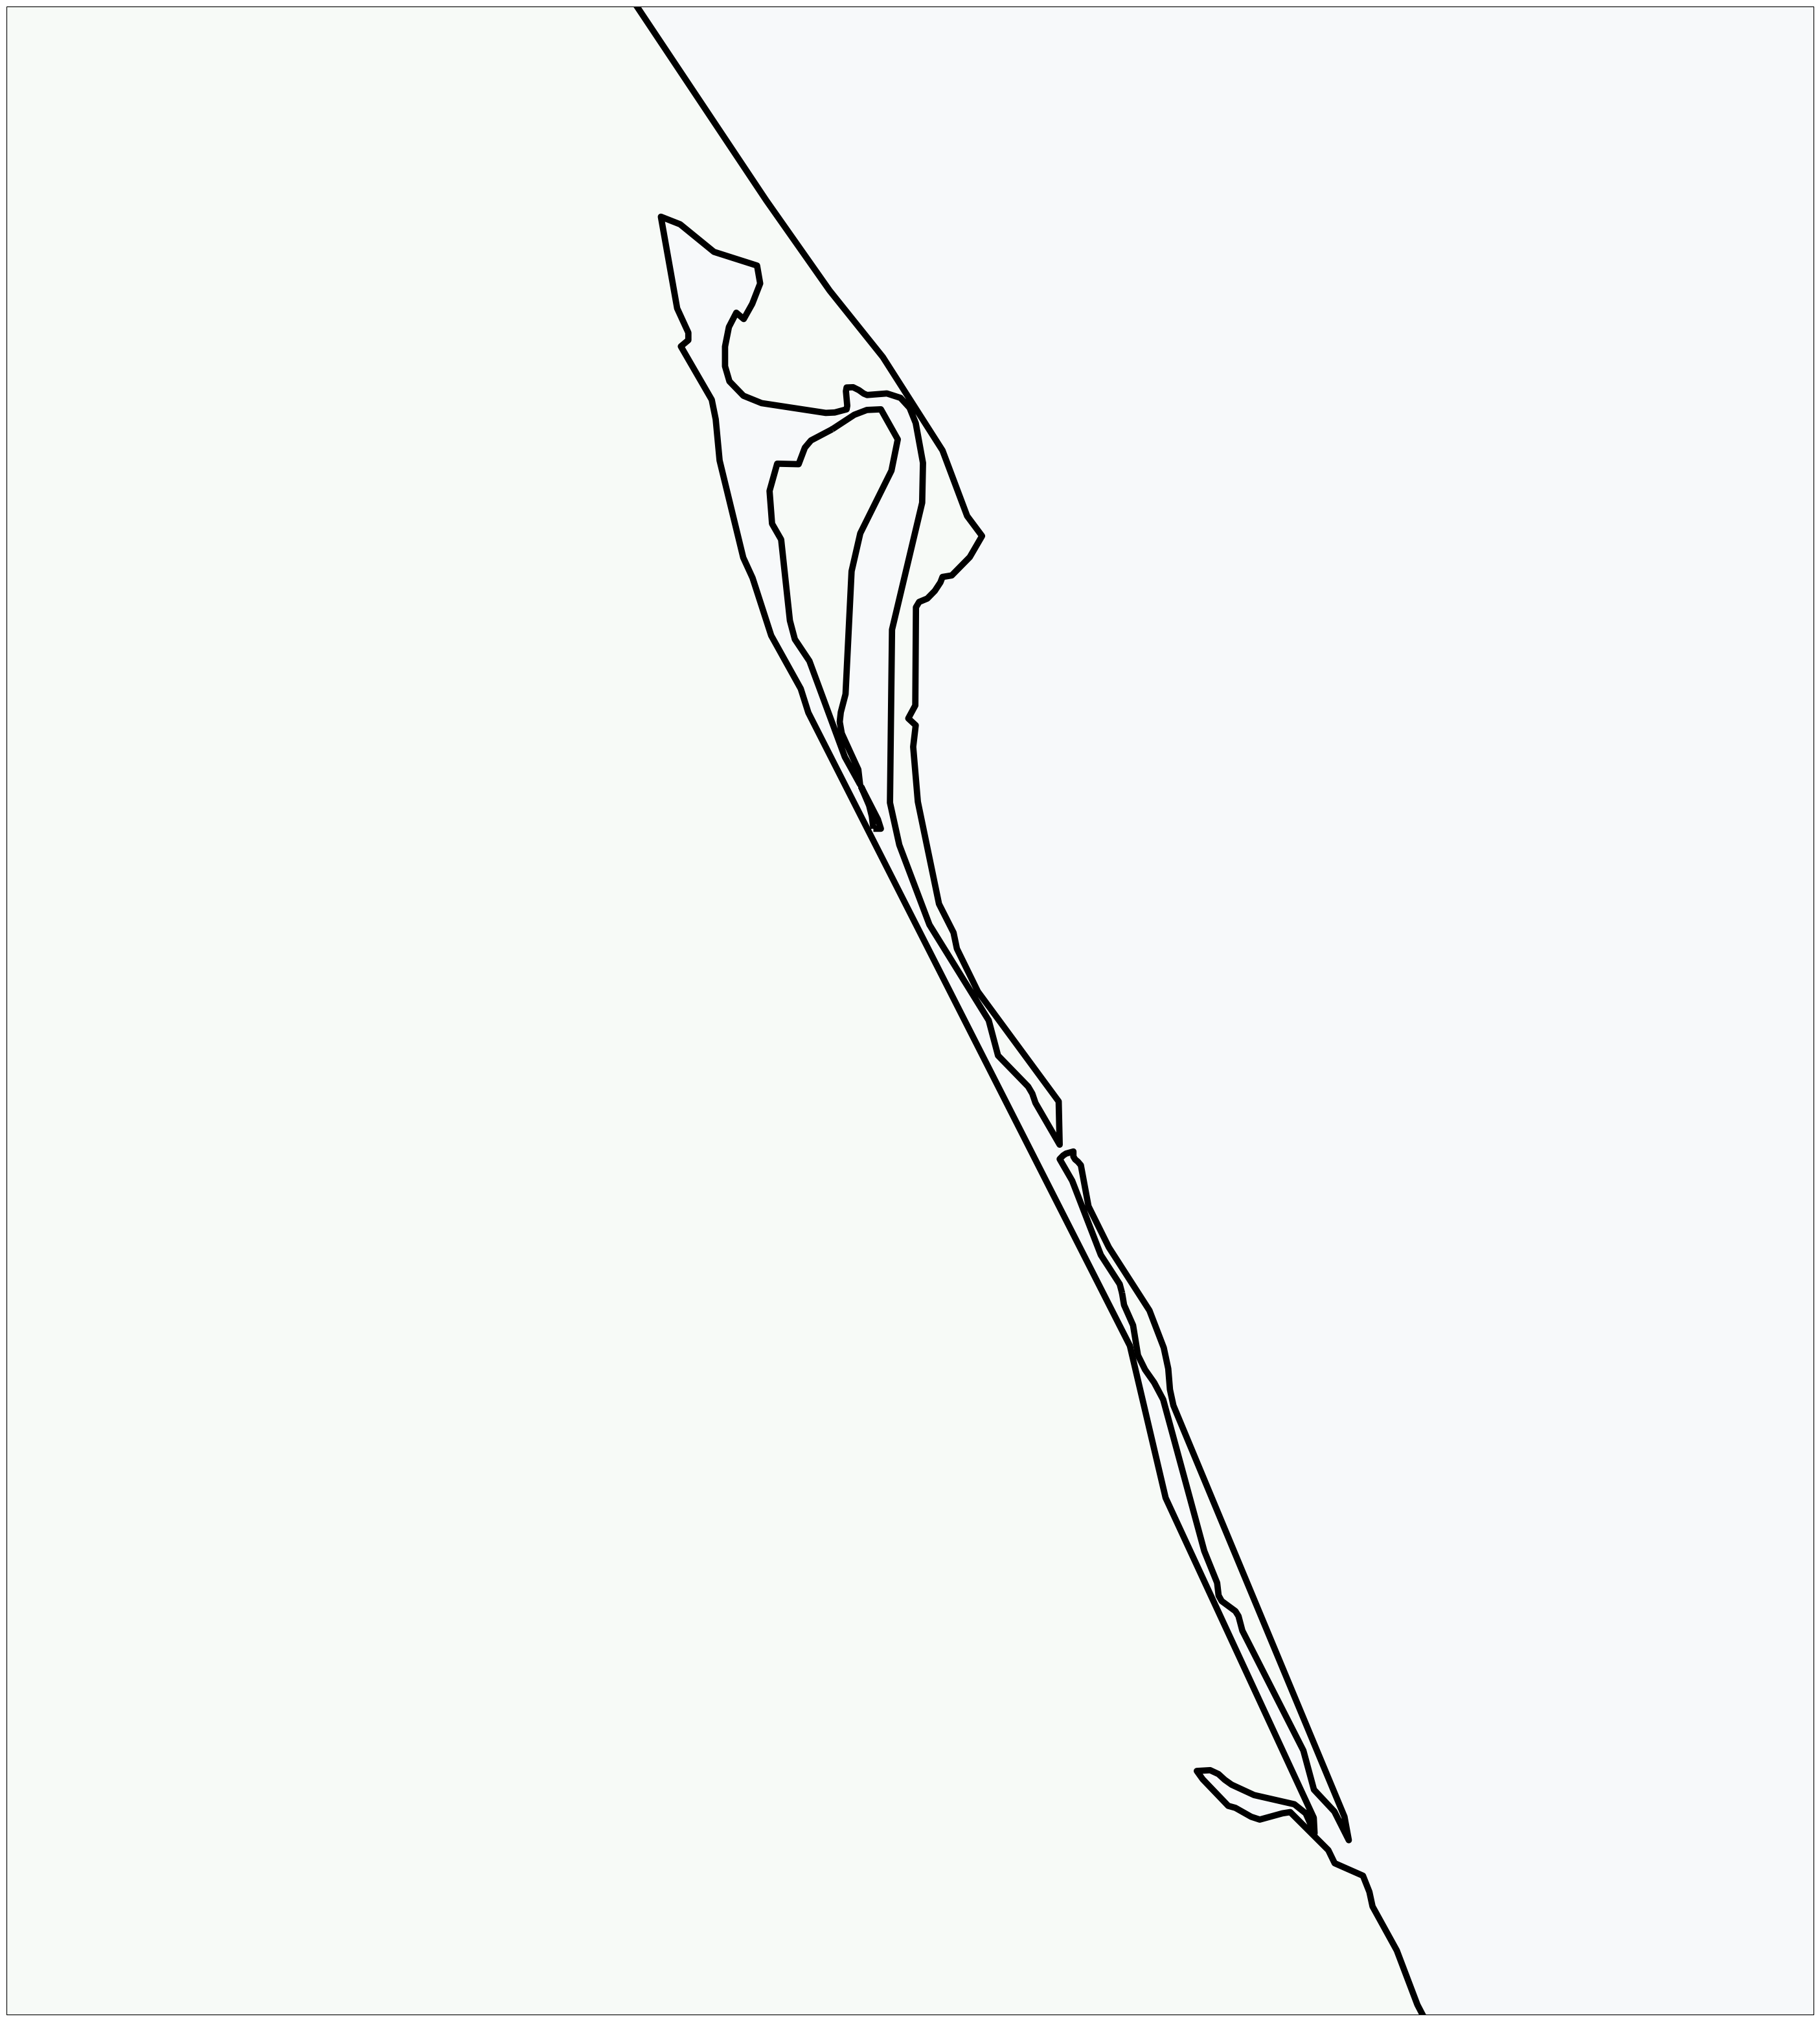

In [22]:
#making it a function

def plot_mapbase(extent, res='10m', projection=ccrs.PlateCarree()):
    fig = plt.figure(figsize=(36,48)) # set fig size
    ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent)
    ax.coastlines(res)
    
    #land
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='#F7FAF7', # change color here
                                                scale=res)) 
    
    #ocean
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='ocean',
                                                facecolor='#F7F9FA', # change color here
                                                scale=res)) 
    
    ax.coastlines(resolution='10m', color='black', linestyle='-', linewidth=7.0, alpha=1)
    
    #gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
    #                  ylocs=np.arange(lat_bot, lat_top+1),
    #                  draw_labels=True, 
    #                  linewidth=0.5, color='k', linestyle=':')
    #gl.top_labels = gl.right_labels = False
    #gl.xformatter = LONGITUDE_FORMATTER
    #gl.yformatter = LATITUDE_FORMATTER
    #gl.xlabel_style = {'size': 15, 'color': 'black'}
    #gl.ylabel_style = {'size': 15, 'color': 'black'}
    return fig, ax

fig, ax = plot_mapbase(extent)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/IRL_map.png')

In [33]:
df_iron_DOC = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/IRL_DATA.csv', sep=',', index_col=0)
df_iron_DOC = pd.DataFrame(df_iron_DOC)

df_CDOM = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/CDOM_DATA_IRL.csv', sep=',', index_col=0)
df_CDOM = pd.DataFrame(df_CDOM)

df_NCS = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/C_solid_stock.csv', sep=',', index_col=0)
df_NCS = pd.DataFrame(df_NCS)

df_NCS

,Carbon_Grams,Carbon_tons,Area_km,C_perc_of_IRL,Cg_square_km
region,,,,,
IRL,9.083210e+07,100.125228,8316000,1.000000,10.922572
Central,3.678823e+07,40.552067,1450000,0.405013,25.371191
North,4.671724e+07,51.496929,6590000,0.514325,7.089111
Saint Lucie,7.326637e+06,8.076232,276000,0.080661,26.545786


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_15940\2524737026.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


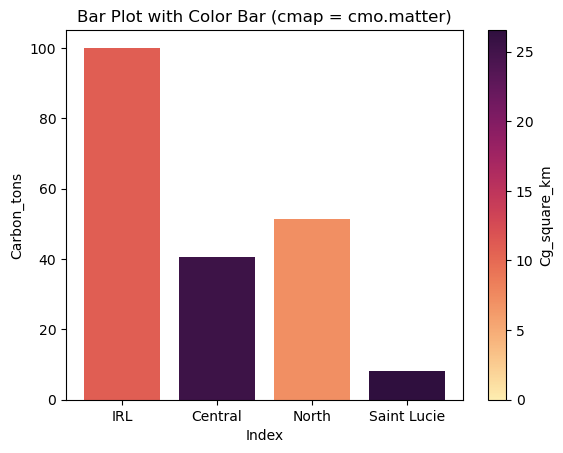

In [39]:
# Normalize the "Cg_square_km" values to use in the color bar
norm = plt.Normalize(0, df_NCS['Cg_square_km'].max())
colors = cmocean.cm.matter(norm(df_NCS['Cg_square_km']))

# Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(df_NCS.index, df_NCS['Carbon_tons'], color=colors)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmocean.cm.matter, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Cg_square_km')

# Set labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Carbon_tons')
ax.set_title('Bar Plot with Color Bar (cmap = cmo.matter)')

# Show the plot
plt.show()

In [26]:
df_CDOM

,Sample_Type,COLLECTION_TYPE,Campaign,Treat,Date,Location,Depth,LAT,LON,Reagion,...,acdom_412,acdom_440,acdom_700,acdom_254_bc,acdom_320_bc,acdom_350_bc,acdom_412_bc,acdom_440_bc,acdom_700_bc,file_id
Sample_ID,,,,,,,,,,,,,,,,,,,,,
223400,WC,OW,IRL,P2F,5/28/2022,S_beach,0,27.58631,-80.348337,Central,...,8.745752,7.906238,5.106445,30.679042,15.298920,12.297574,8.745752,7.906238,5.106445,223400_Absorbance__0__00
223400,WC,OW,IRL,P2F,5/28/2022,S_beach,0,27.58631,-80.348337,Central,...,7.750844,6.659551,4.192182,29.771992,14.342534,11.077392,7.750844,6.659551,4.192182,223400_Absorbance__1__01
223400,WC,OW,IRL,P2F,5/28/2022,S_beach,0,27.58631,-80.348337,Central,...,6.851935,6.108417,3.523448,28.611131,13.299513,10.271200,6.851935,6.108417,3.523448,223400_Absorbance__2__02
223401,RZ,CORE,IRL,P2F,5/28/2022,S_beach,0.5,27.58631,-80.348337,Central,...,-0.292017,-0.724651,-2.691557,17.361165,4.845923,2.141715,-0.292017,-0.724651,-2.691557,223401_Absorbance__0__03
223401,RZ,CORE,IRL,P2F,5/28/2022,S_beach,0.5,27.58631,-80.348337,Central,...,-0.332518,-0.831341,-2.588550,17.350909,4.893154,2.073726,-0.332518,-0.831341,-2.588550,223401_Absorbance__1__04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233777,RZ,CORE,IRL-C44,P2F,10/13/2023,SF,14,27.18780,-80.264200,Saint Lucie,...,36.848026,25.333000,4.625312,168.119000,112.847000,82.908000,36.848026,25.333000,4.625312,233777_Absorbance__1__013
233778,RZ,CORE,IRL-C44,P2F,10/13/2023,SF,16,27.18780,-80.264200,Saint Lucie,...,41.454027,27.636000,4.626024,170.422000,122.059000,92.112696,41.454027,27.636000,4.626024,233778_Absorbance__0__014
233778,RZ,CORE,IRL-C44,P2F,10/13/2023,SF,16,27.18780,-80.264200,Saint Lucie,...,41.454027,27.636000,4.625961,170.422000,122.059000,92.112696,41.454027,27.636000,4.625961,233778_Absorbance__1__015


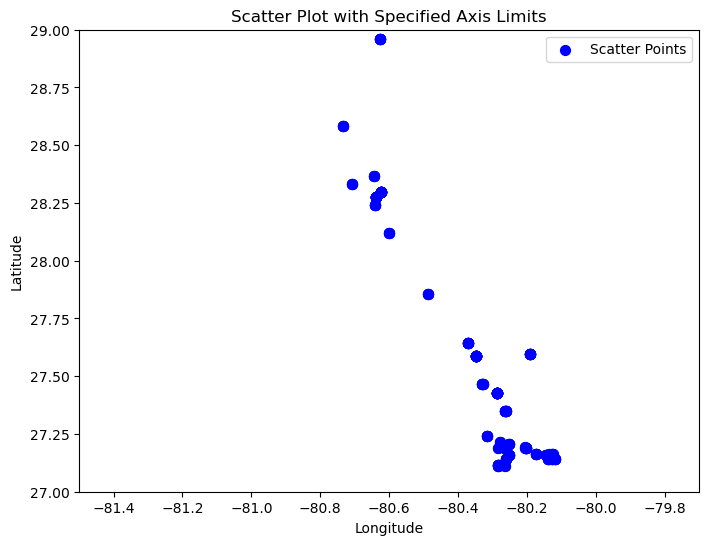

In [49]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_CDOM['LON'], df_CDOM['LAT'], s=50, c='blue', marker='o', label='Scatter Points')

# Set axis limits based on the extent
plt.xlim(extent[0], extent[1])
plt.ylim(extent[2], extent[3])

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Specified Axis Limits')

# Add a legend if needed
plt.legend()

# Show the plot
plt.show()

Text(0.5, 0.95, 'Sediment Samples')

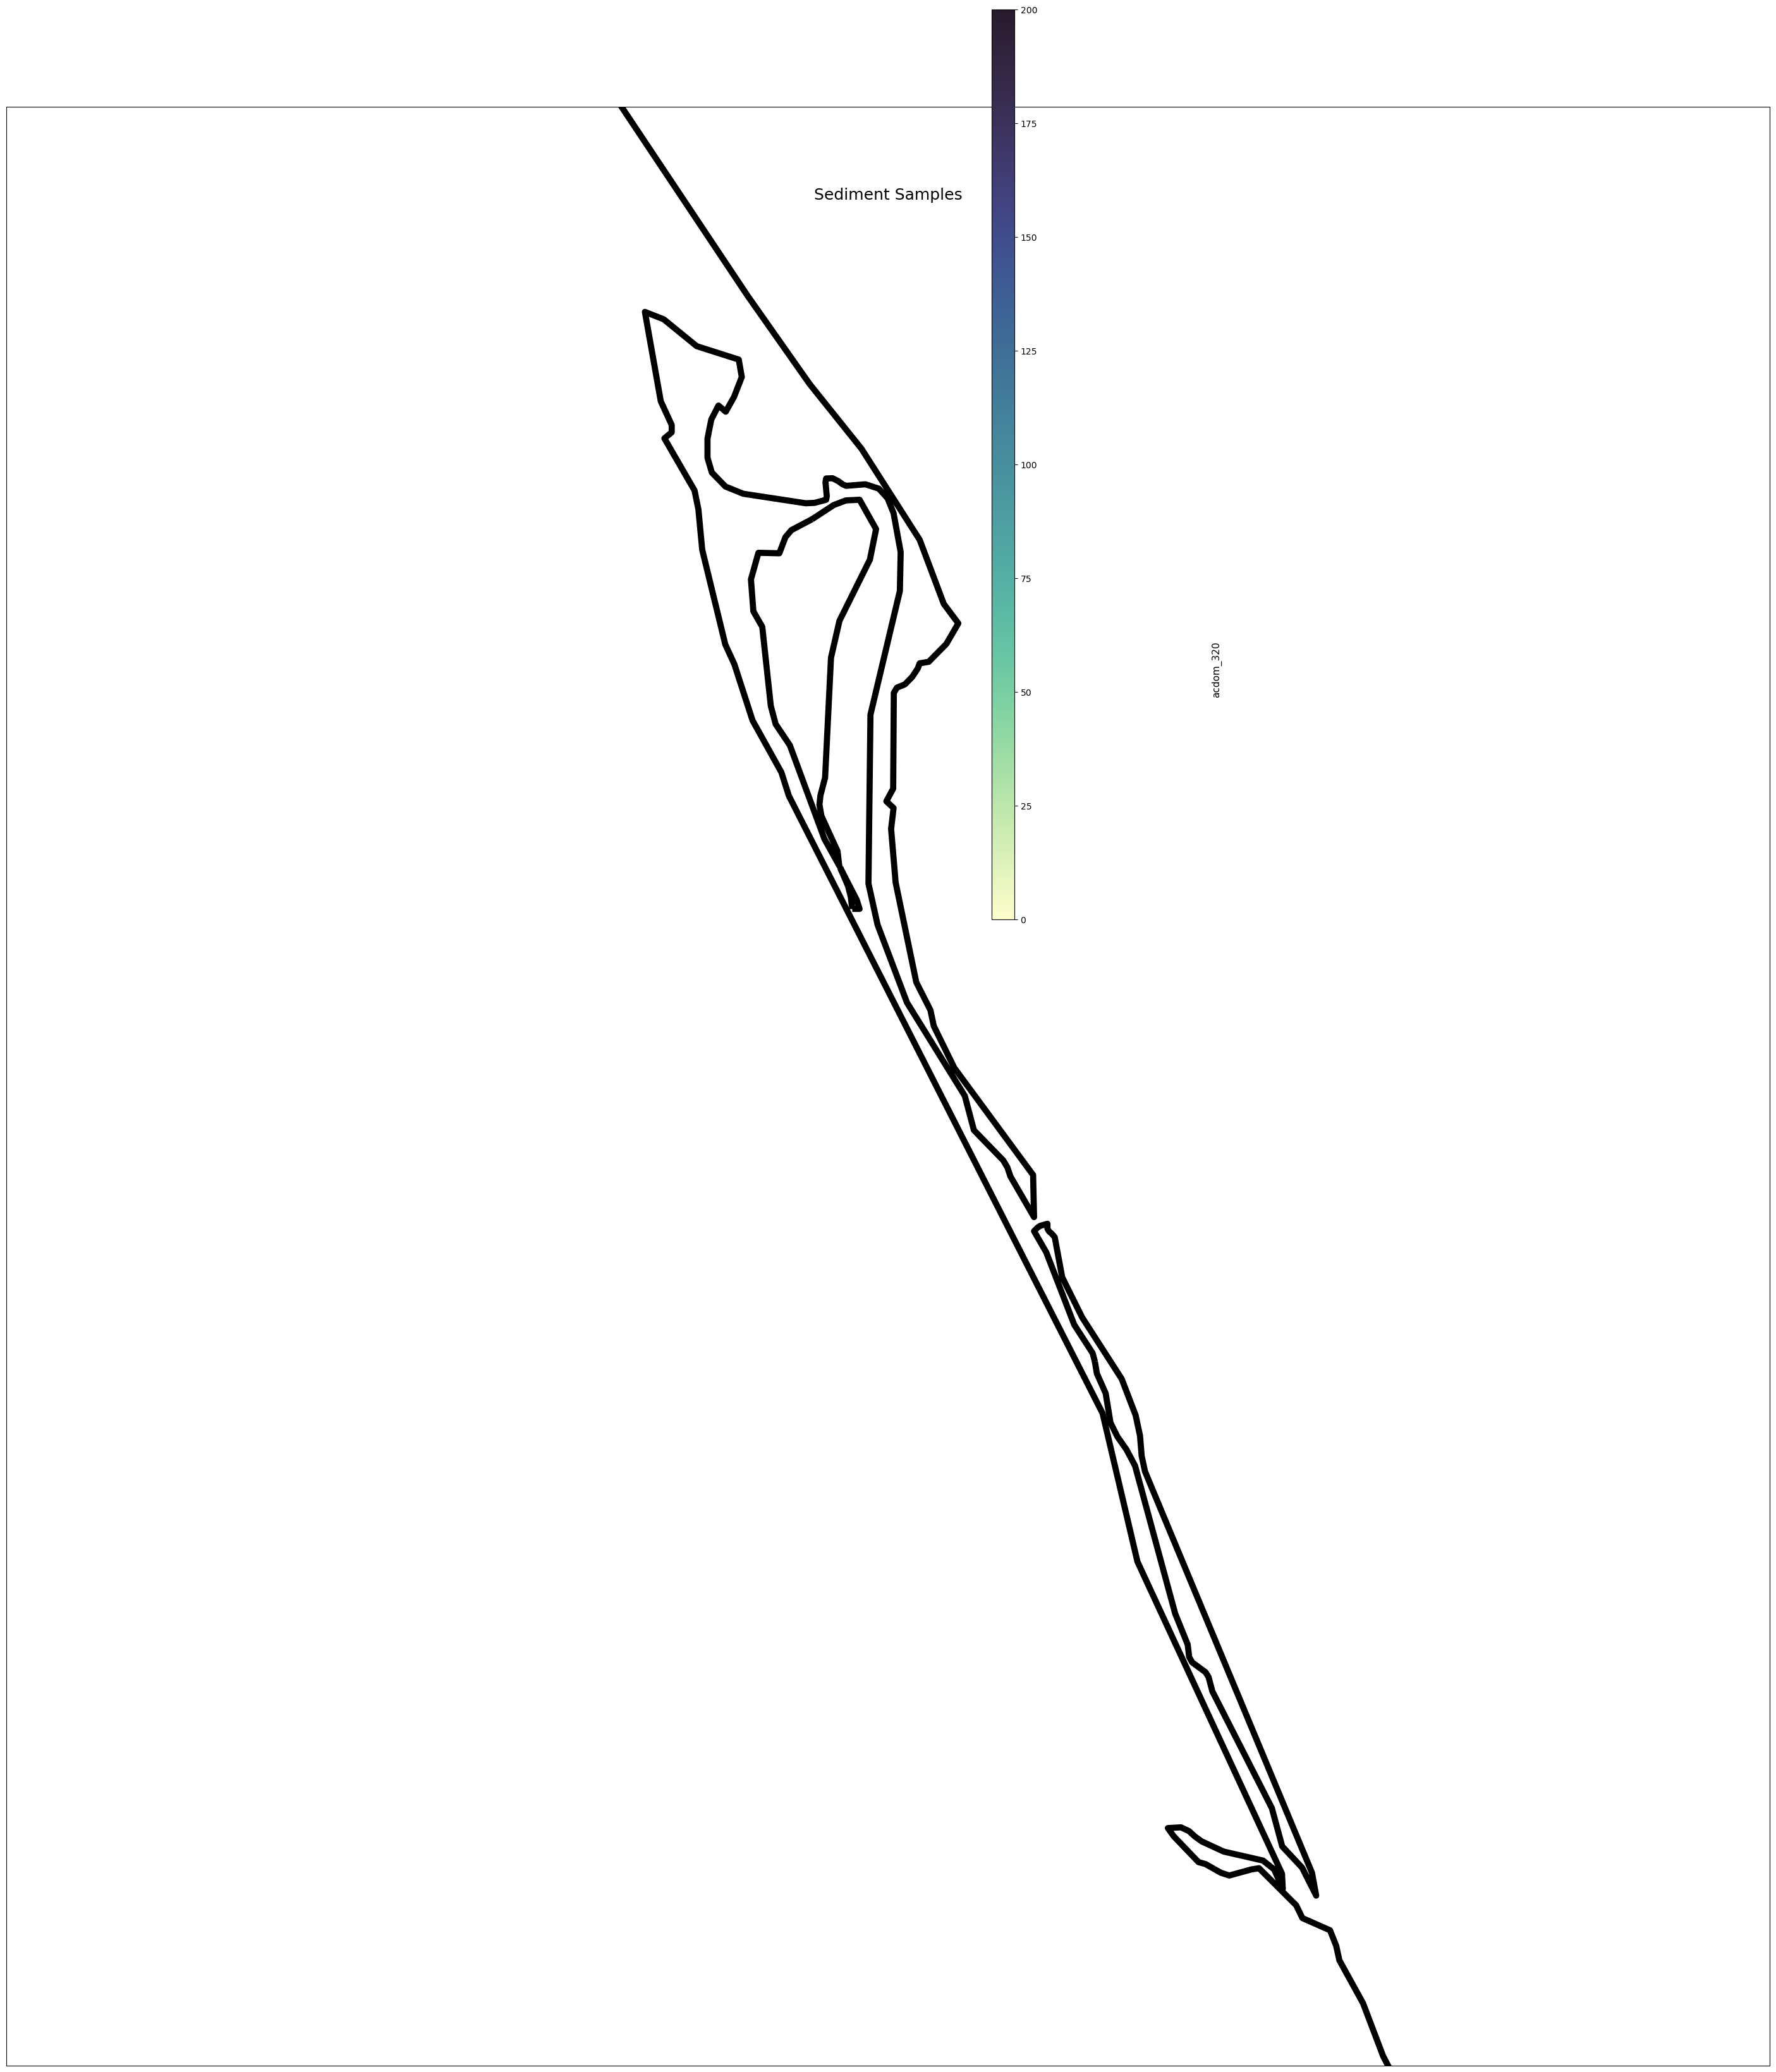

In [51]:
def plot_mapbase(extent, res='10m', projection=ccrs.PlateCarree()):
    fig = plt.figure(figsize=(36,48)) # set fig size
    ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.coastlines(resolution='10m', color='black', linestyle='-', linewidth=7.0, alpha=1)
    return fig, ax

fig, ax = plot_mapbase(extent)
mappable = ax.scatter(df_CDOM['LAT'], df_CDOM['LON'], # lon, lat variable as x,y
           c=df_CDOM['acdom_320_bc'],
           edgecolor='k',  #you color variable
           vmin=0, vmax=200, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.deep, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=3000, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cax = fig.add_axes([.558, .55, .01, .30])
cb = fig.colorbar(mappable, cax=cax)
ax.text(-80.27,28.4, 'acdom_320', size=11, rotation=90)
ax.set_title("Sediment Samples", size = 18, y=.95)

#plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/IRL_map.png')

fig, ax = plot_mapbase(extent)
mappable = ax.scatter(df['LON'], df['LAT'], # lon, lat variable as x,y
           c=df['acdom412'],
           edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.matter, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=300, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cax = fig.add_axes([.565, .55, .01, .30])
cb = fig.colorbar(mappable, cax=cax)
#ax.text(-80.26,28.3, 'Surface Water\n'+'a$_{CDOM}$ (412 nm) (1/m)', size=10, rotation=90)
#cb.set_label('Surface Water\n'+'a$_{CDOM}$ (412 nm) (1/m)', size=10, verticalalignment='left')

fig.set_size_inches(20,10)